In [19]:
import kagglehub
import pandas as pd
import os
import shutil

# Get the current directory (src folder)
current_dir = os.getcwd()

# Go up one level to the project root
project_root = os.path.dirname(current_dir)

# Create data directory at the project root level
data_dir = os.path.join(project_root, "data")
os.makedirs(data_dir, exist_ok=True)

# Create a subdirectory for the news dataset
news_data_dir = os.path.join(data_dir, "News_dataset")
os.makedirs(news_data_dir, exist_ok=True)

# Download to kagglehub's cache first (this is required as kagglehub always downloads to cache)
cache_path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets") + "/News _dataset"
print("Downloaded to cache at:", cache_path)

# Copy the files to our data directory
fake_src = os.path.join(cache_path, "Fake.csv")
true_src = os.path.join(cache_path, "True.csv")

fake_dest = os.path.join(news_data_dir, "Fake.csv")
true_dest = os.path.join(news_data_dir, "True.csv")

shutil.copy2(fake_src, fake_dest)
shutil.copy2(true_src, true_dest)

print(f"Files copied to: {news_data_dir}")

# Now load from the local data directory
fake_ds = pd.read_csv(fake_dest)
true_ds = pd.read_csv(true_dest)

print(f"Loaded {len(fake_ds)} fake news records and {len(true_ds)} true news records")
print(f"Data directory created at: {data_dir}")

Downloaded to cache at: C:\Users\roros\.cache\kagglehub\datasets\emineyetm\fake-news-detection-datasets\versions\1/News _dataset
Files copied to: c:\Users\roros\Documents\ie\Computer_Science_and_Artificial_Intelligence\Year_3\Q2\Natural Language Processing\final_project\factos_api\data\News_dataset
Loaded 23481 fake news records and 21417 true news records
Data directory created at: c:\Users\roros\Documents\ie\Computer_Science_and_Artificial_Intelligence\Year_3\Q2\Natural Language Processing\final_project\factos_api\data


In [20]:
fake_ds.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [21]:
true_ds.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [22]:
fake_ds['label'] = 0
fake_ds.head()
true_ds['label'] = 1
true_ds.head()
dataset = pd.concat([fake_ds, true_ds])
dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [23]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\roros\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [24]:
# Lemmatization

lemmatizer = WordNetLemmatizer()

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it wa revealed that former Milwauke...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [25]:
# Drop rows with missing values

dataset = dataset.dropna()
dataset.head()

# Remove stopwords

stop_words = set(stopwords.words('english'))

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in stop_words]))

# Remove punctuation

dataset['text'] = dataset['text'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

dataset.head()

# tokenize

dataset['text'] = dataset['text'].apply(lambda x: word_tokenize(x))

dataset.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"[on, wa, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[on, christmas, donald, trump, announced, woul...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",0


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\roros\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Average sentiment scores by news type (0=Fake, 1=Real):
       sentiment_neg  sentiment_neu  sentiment_pos  sentiment_compound
label                                                                 
0           0.133579       0.680090       0.155326             0.09436
1           0.110118       0.738825       0.151013             0.26568


<Figure size 1000x600 with 0 Axes>

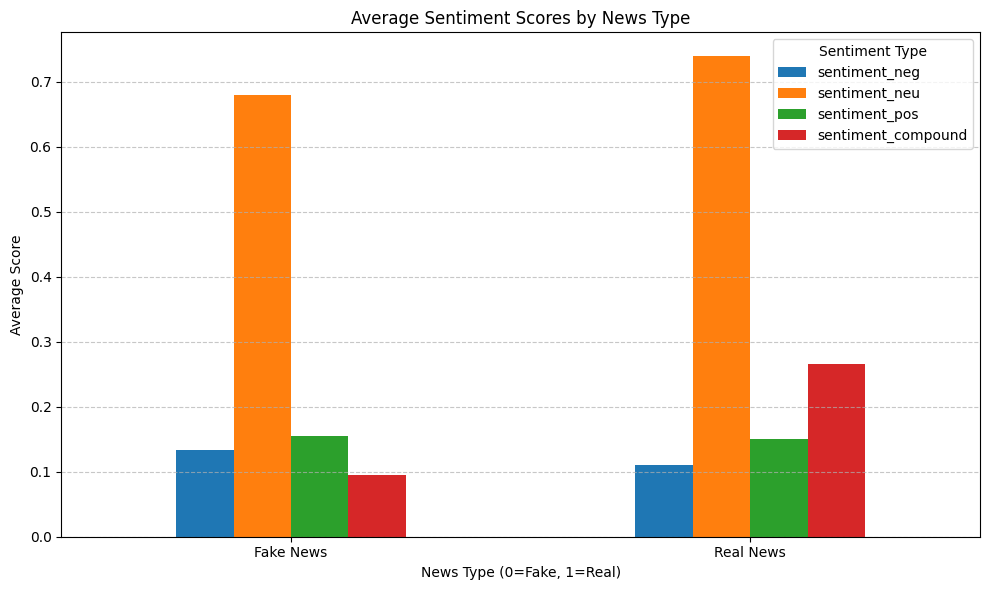

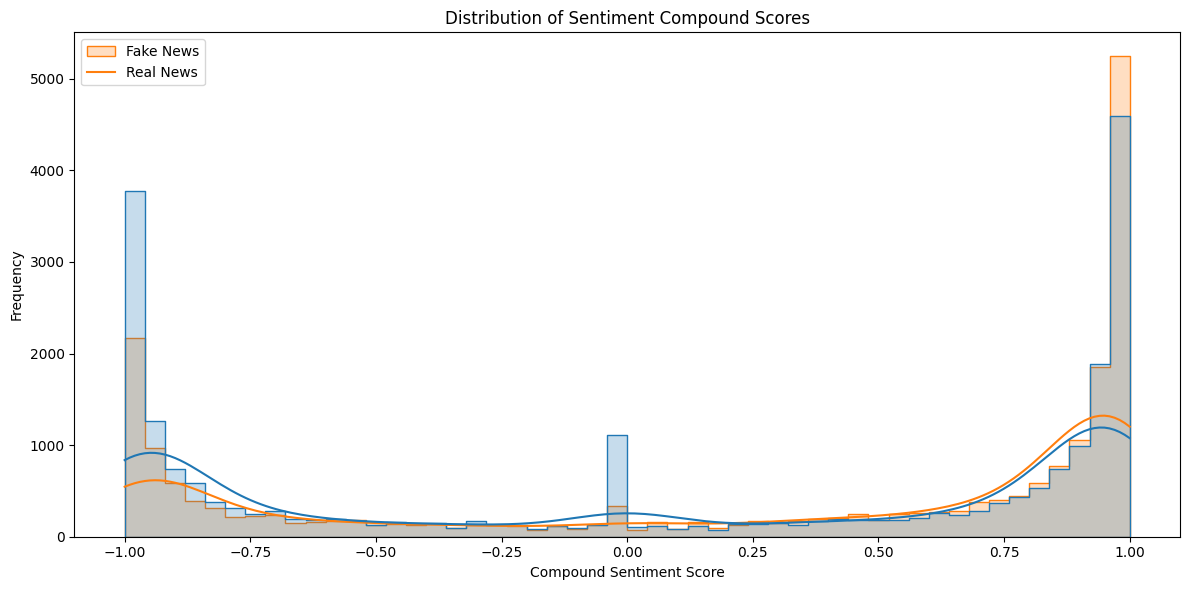

In [26]:
# Install vader_lexicon if not already installed
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

def add_sentiment_features(df):
    """
    Adds sentiment analysis features to the dataframe based on the text column.
    
    Args:
        df: DataFrame with a 'text' column containing tokenized text
        
    Returns:
        DataFrame with added sentiment features
    """
    # Initialize the sentiment analyzer
    sid = SentimentIntensityAnalyzer()
    
    # Create a copy of the dataframe to avoid modifying the original
    result_df = df.copy()
    
    # We need to join the tokens back into text for sentiment analysis
    # Create a temporary column with joined text
    result_df['text_string'] = result_df['text'].apply(lambda tokens: ' '.join(tokens))
    
    # Calculate sentiment scores for each article
    result_df['sentiment_neg'] = result_df['text_string'].apply(lambda x: sid.polarity_scores(x)['neg'])
    result_df['sentiment_neu'] = result_df['text_string'].apply(lambda x: sid.polarity_scores(x)['neu'])
    result_df['sentiment_pos'] = result_df['text_string'].apply(lambda x: sid.polarity_scores(x)['pos'])
    result_df['sentiment_compound'] = result_df['text_string'].apply(lambda x: sid.polarity_scores(x)['compound'])
    
    # Drop the temporary column
    result_df = result_df.drop('text_string', axis=1)
    
    return result_df

# Apply sentiment analysis to the dataset
dataset_with_sentiment = add_sentiment_features(dataset)

# Show the first few rows with sentiment scores
dataset_with_sentiment.head()

# Calculate average sentiment scores for fake vs real news
sentiment_by_label = dataset_with_sentiment.groupby('label')[
    ['sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound']
].mean()

print("Average sentiment scores by news type (0=Fake, 1=Real):")
print(sentiment_by_label)

# Visualize the sentiment differences
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sentiment_by_label.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sentiment Scores by News Type')
plt.xlabel('News Type (0=Fake, 1=Real)')
plt.ylabel('Average Score')
plt.xticks([0, 1], ['Fake News', 'Real News'], rotation=0)
plt.legend(title='Sentiment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot distribution of compound sentiment scores
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset_with_sentiment, x='sentiment_compound', hue='label', 
             bins=50, kde=True, element='step', common_norm=False)
plt.title('Distribution of Sentiment Compound Scores')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.legend(labels=['Fake News', 'Real News'])
plt.tight_layout()
plt.show()

In [30]:
dataset_with_sentiment.head(5)

,title,text,subject,date,label,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
0,Donald Trump Sends Out Embarrassing New Year’...,"[donald, trump, wish, americans, happy, new, y...",News,"December 31, 2017",0,0.210,0.525,0.265,0.9328
1,Drunk Bragging Trump Staffer Started Russian ...,"[house, intelligence, committee, chairman, dev...",News,"December 31, 2017",0,0.116,0.747,0.137,-0.0846
2,Sheriff David Clarke Becomes An Internet Joke...,"[on, wa, revealed, former, milwaukee, sheriff,...",News,"December 30, 2017",0,0.246,0.641,0.113,-0.9922
3,Trump Is So Obsessed He Even Has Obama’s Name...,"[on, christmas, donald, trump, announced, woul...",News,"December 29, 2017",0,0.061,0.835,0.104,0.8701
4,Pope Francis Just Called Out Donald Trump Dur...,"[pope, francis, used, annual, christmas, day, ...",News,"December 25, 2017",0,0.159,0.632,0.210,0.9025
